<a href="https://colab.research.google.com/github/bcool4ever/Dissertation/blob/master/yakub_plantclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets,models,layers,optimizers
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from google.colab.patches import cv2_imshow

In [ ]:
batch_size = 40
numofclasses = 10
#epochs = 40


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
y = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels.csv')

In [ ]:
y.head() #Checking to see existing column names

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [ ]:
y = y.rename(columns={'Label':'Plants'}) #Changing the Label to identify the list as containing different types of plants

y_df = pd.DataFrame(data=y,columns=["Plants"])

In [ ]:
#dta = {1:"Small-flowered Cranesbill",2:"Fat Hen",3:"Shepherds Purse",4:"Common wheat",5:"Common Chickweed",6:"Charlock",7:"Cleavers",8:"Scentless Mayweed",9:"Sugar beet",10:"Maize",11:"Black-grass",12:"Loose Silky-bent"}
#y_label = pd.DataFrame(list(dta.items()),columns=['Num','Plants'])
#y_label.reset_index(drop=True,inplace=True)
#print(y_label.shape)

In [ ]:
x = np.load('/content/drive/My Drive/Colab Notebooks/images.npy') #Using numpy load function to retrieve the images to be processed

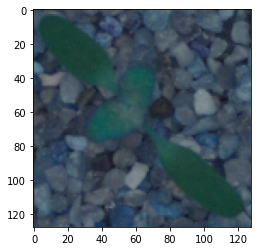

In [ ]:
plt.imshow(x[800])

In [ ]:
X = x.astype('float32')/255.0 #normalization of x data

In [ ]:
Y = y_df.values
print(Y)

[['Small-flowered Cranesbill']
 ['Small-flowered Cranesbill']
 ['Small-flowered Cranesbill']
 ...
 ['Loose Silky-bent']
 ['Loose Silky-bent']
 ['Loose Silky-bent']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.70,random_state=0)

In [ ]:
print(Y_train[0])

['Black-grass']


Text(0.5, 1.0, "['Scentless Mayweed']")

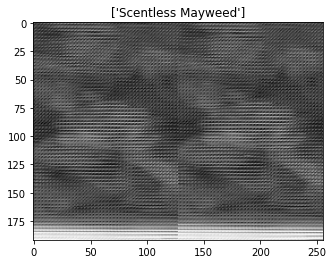

In [ ]:
i = 3000
img = X[i]
img = img.reshape((192,256)) #Original 1D data reshaped from 49152pixels values to a 2D array of shape
plt.imshow(img,cmap='gray')
plt.title(Y[i])

In [ ]:
X[i].shape

(128, 128, 3)

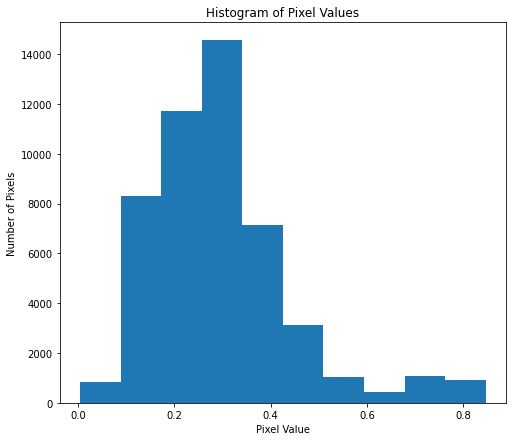

In [ ]:
#Visualisation of pixel values of sample data(plant)
plt.figure(figsize=(8,7),edgecolor='blue')
counts,bins,bars = plt.hist(X[i].flatten())
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Pixel Values')
plt.show()

In [ ]:
#Conversion of Y labels to one hot vectors
#from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#labelEncoder = LabelEncoder()
#labelEncoded = labelEncoder.fit_transform(y_df['Plants'])
#oneHotEncoder = OneHotEncoder(sparse=False)
#labelEncoded = labelEncoded.reshape(len(labelEncoded),1)
#oneHotEncoded = oneHotEncoder.fit_transform(labelEncoded)
#print(oneHotEncoded)
#Y = oneHotEncoded
#OR
from sklearn.preprocessing import LabelBinarizer
encod = LabelBinarizer()
Y_train = encod.fit_transform(Y_train)
Y_test = encod.fit_transform(Y_test)

In [ ]:
#Verifying the shapes of train and test dataset.
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0],'Train Samples')
print(X_test.shape[0],'Test Samples')

X_train shape: (3325, 128, 128, 3)
X_test shape: (1425, 128, 128, 3)
3325 Train Samples
1425 Test Samples


In [ ]:
X_train = X_train.reshape()

In [ ]:
Y_train[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Significant change in pixel values after Gaussian Blurring has been applied
#plt.figure(figsize=(8,7),edgecolor='blue')
#counts,bins,bars = plt.hist(dst.flatten())
#plt.xlabel('Pixel Value')
#plt.ylabel('Number of Pixels')
#plt.title('Histogram of Pixel Values')
#plt.show()

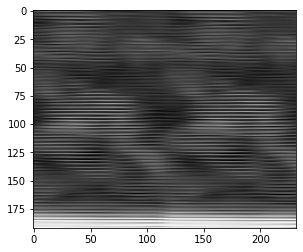

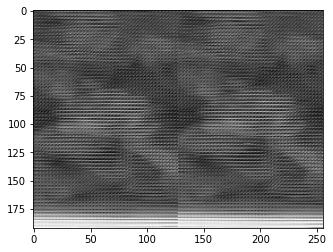

In [ ]:
#Applying gaussian blurring to specific plant image
from scipy.signal import convolve2d
kernel = np.array([[0.003765,0.015019,0.023792,0.015019,0.003765,
0.015019,0.059912,0.094907,0.059912,0.015019,
0.023792,0.094907,0.150342,0.094907,0.023792,
0.015019,0.059912,0.094907,0.059912,0.015019,
0.003765,0.015019,0.023792,0.015019,0.003765]])
blurredimage = convolve2d(img,kernel,mode='valid')
plt.imshow(blurredimage,cmap='gray') #Blurred Image
plt.show()
plt.imshow(img,cmap='gray') #Original gray Image


In [ ]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)

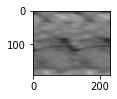

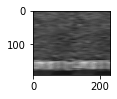

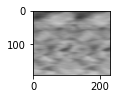

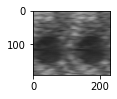

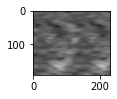

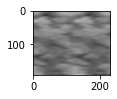

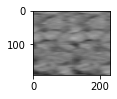

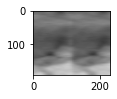

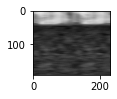

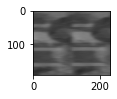

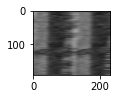

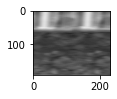

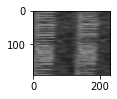

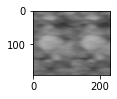

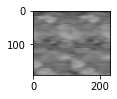

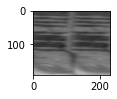

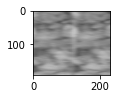

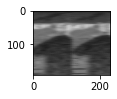

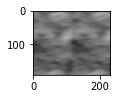

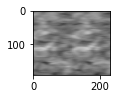

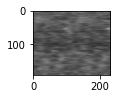

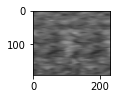

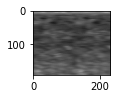

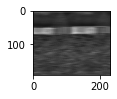

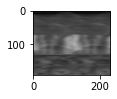

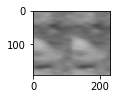

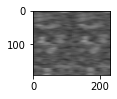

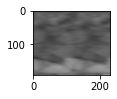

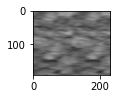

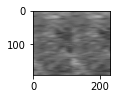

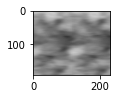

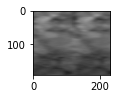

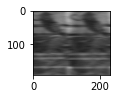

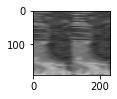

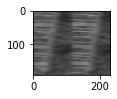

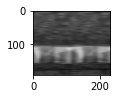

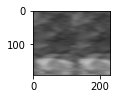

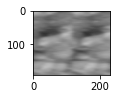

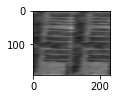

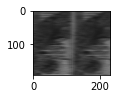

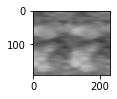

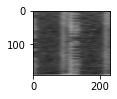

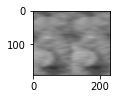

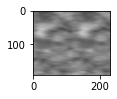

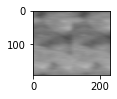

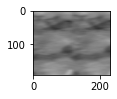

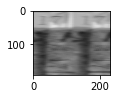

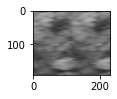

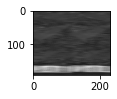

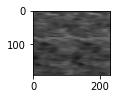

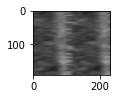

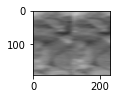

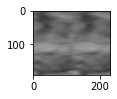

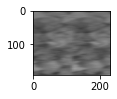

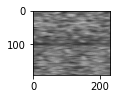

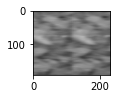

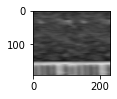

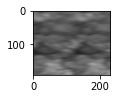

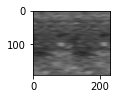

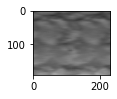

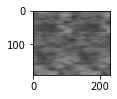

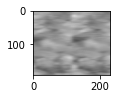

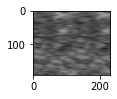

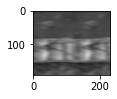

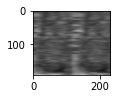

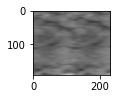

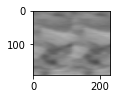

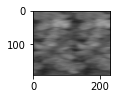

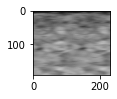

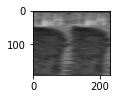

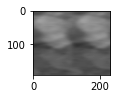

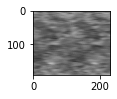

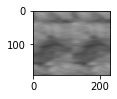

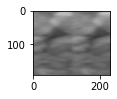

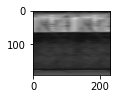

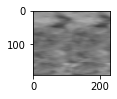

KeyboardInterrupt: ignored

In [ ]:
#Applying Gaussian blurring to data sets for proper model training
for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size):
  for i in range(0,9):
    plt.subplot(330 + 1 + i)
    blurredimg2 = convolve2d(X_batch[i].reshape(192,256),kernel,mode='valid')
    plt.imshow(blurredimg2, cmap='gray')
    plt.show()
    break

In [ ]:
#Definition of layers
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),padding='same',batch_size=batch_size,activation='relu',input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64,(5,5),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64,(53,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2))) #Down sampling to avoid overfitting
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12,activation='softmax')) #To handle the number of distinct plants in the dataset

model.summary()




Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (40, 128, 128, 32)        2432      
_________________________________________________________________
batch_normalization_61 (Batc (40, 128, 128, 32)        128       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (40, 64, 64, 32)          0         
_________________________________________________________________
dropout_70 (Dropout)         (40, 64, 64, 32)          0         
_________________________________________________________________
conv2d_63 (Conv2D)           (40, 64, 64, 64)          51264     
_________________________________________________________________
batch_normalization_62 (Batc (40, 64, 64, 64)          256       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (40, 32, 32, 64)        

In [ ]:
#Initialize Adam optimizer
opt = optimizers.Adam(learning_rate=0.001,beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [ ]:
#Setting optimizer and loss function
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
#Time constraint limited the number of epochs to just 10.
EPOCHS = 10
checkpoint_filepath = '/tmp/checkpoint'
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0.001,patience=12)

model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)


In [ ]:
train_gen = datagen.flow(X_train,Y_train,batch_size=batch_size)
test_gen = datagen.flow(X_test,Y_test,batch_size=batch_size)

In [ ]:
X_train.shape[0]

3325

In [ ]:
history = model.fit_generator(train_gen,steps_per_epoch = X_train.shape[0] 
                              ,epochs=EPOCHS,validation_data=test_gen,validation_steps = X_test.shape[0]//batch_size )


plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

Epoch 1/10
30/83 [=========>....................] - ETA: 5:12 - loss: 4.9403 - accuracy: 0.1192

In [ ]:
#Score trained model
scores = model.evaluate(X_test,Y_test,verbose=1)
print('Test loss:',scores[0])
print('Test accuracy:',scores[1])

45/45 [==============================] - 51s 1s/step - loss: 1.9664 - accuracy: 0.0800
Test loss: 1.966408133506775
Test accuracy: 0.07999999821186066


In [ ]:
#printing predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]
Y_pred = model.predict(X_test[2])
ypred = np.argmax(Y_pred,axis=1)
print(ypred)

Y_pred = model.predict(X_test[3])
ypred = np.argmax(Y_pred,axis=1)
print(ypred)

Y_pred = model.predict(X_test[33])
ypred = np.argmax(Y_pred,axis=1)
print(ypred)

Y_pred = model.predict(X_test[36])
ypred = np.argmax(Y_pred,axis=1)
print(ypred)

Y_pred = model.predict(X_test[59])
ypred = np.argmax(Y_pred,axis=1)
print(ypred)

[10 10 10 ... 10 10 10]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("========Confusion Matrix========")
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

In [ ]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm,annot=True,fmt='d')

In [ ]:
print("=====Classification Report=======")
print(classification_report(Y_test,Y_pred))